author: aho:jchung

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# PART I
# 1. Matrix of random values
np.random.rand(3, 2)

array([[ 0.0189359 ,  0.72456993],
       [ 0.74577315,  0.67247411],
       [ 0.94231271,  0.90207648]])

In [7]:
# 2. 1-dimensional array of 12 sequential numbers convered to 4x3 array
a = np.arange(12).reshape(4, 3)
print(a)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [8]:
#3. Function that creates incremental nd array of dimension (1, n) with values b/w 0 and 1

def createarray(n):
    b = np.linspace(0, 1, n)
    b = np.expand_dims(b, axis = 0)
    return(b)

test = createarray(5)
print(test.shape)
print(test)
type(test)

(1, 5)
[[ 0.    0.25  0.5   0.75  1.  ]]


numpy.ndarray

In [9]:
#4. Generate 10x12 array and extract row 0-4 of columns 8 - 12
c = np.random.randint(10, size = (10, 12))
print(c)

[[0 1 3 4 8 2 6 3 1 2 9 6]
 [9 3 3 8 2 9 1 8 0 4 7 6]
 [5 1 3 8 3 7 6 7 5 5 5 5]
 [4 6 0 6 4 5 7 7 7 4 2 0]
 [3 5 1 0 3 3 1 4 5 0 4 8]
 [5 3 3 0 1 7 7 4 7 3 4 2]
 [9 9 4 2 4 6 2 8 5 4 0 3]
 [5 3 3 3 3 3 2 9 3 5 8 3]
 [5 1 4 5 7 1 7 7 8 4 0 6]
 [0 4 9 2 2 0 8 6 3 5 7 2]]


In [10]:
c = c[:5, 7:13]
print(c)

[[3 1 2 9 6]
 [8 0 4 7 6]
 [7 5 5 5 5]
 [7 7 4 2 0]
 [4 5 0 4 8]]


[[ 0.   0.5  1. ]
 [ 0.   0.5  1. ]
 [ 0.   0.5  1. ]]


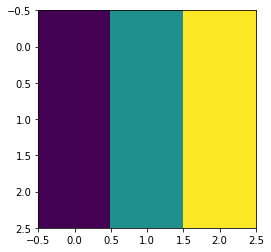

In [11]:
#5. Use previous function, get m vectors and bind them together for (m x n) matrix 
# plot matrix with matplotlib imshow

def gradient_matrix(m, n):
    matrix = [createarray(n) for _ in range(m)]
    matrix = np.vstack(matrix)
    return (matrix)
matrix = gradient_matrix(3, 3)
plt.imshow(matrix)
print(matrix)

In [12]:
image_matrix = plt.imread("heygirl.png")

(290, 290, 3)


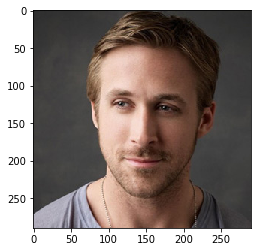

In [13]:
plt.imshow(image_matrix)
print(image_matrix.shape)

(290, 290, 3)


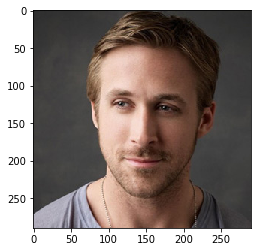

In [14]:
new_image_matrix = plt.imread("heygirl.png")
print(new_image_matrix.shape)
plt.imshow(new_image_matrix)

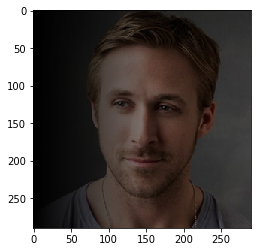

In [15]:
#Question 6
x, y, ch = new_image_matrix.shape[0], new_image_matrix.shape[1], new_image_matrix.shape[2]
gradient = gradient_matrix(x, y)

for i in range(ch):
    new_image_matrix[:, :, i] *= gradient
    
plt.imshow(new_image_matrix[:,:,:])

In [16]:
#split up rgb color channels
def rgb_split(image):
    r = image[:,:,0]
    g = image[:,:,1]
    b = image[:,:,2]
    return (r,g,b)

new_image_matrix = plt.imread("heygirl.png")
r, g, b = rgb_split(new_image_matrix)

In [17]:
#merge rgb color channels
def rgb_merge(r, g, b):
    return np.stack((r,g,b), axis = 2)

In [18]:
# adjust rgb
def adjust_rgb(ch, interp_values_array):
    flat_array = ch.flatten()
    interp_line = np.linspace(0, 1, len(interp_values_array))
    adjusted = np.interp(flat_array, interp_line, interp_values_array)
    return (adjusted.reshape(ch.shape))

normalish = [0, 0.25, 0.5, 0.75, 1]
boostlow = [0.8, 0.75, 0.6, 0.5, 0.5, 0.5] #make lower values more of the color
boosthigh = [0.25, 0.35, 0.7, 0.75, 0.8, 0.9] #make more of the higher values
superboost = [0, 0.05, 0.10, 0.15, 0.4, 0.7, 0.7, 0.7, 0.7] #super boost on high values 

In [19]:
def vignette(m,n,definition):
    mask = np.ones((m, n))
    return ([[np.clip(((np.sin(np.pi * (x/n))) + (np.sin(np.pi * (y/m)))) ** definition, 0, 1) for x in range(n)] for y in range(m)])

x,y,ch = new_image_matrix.shape[0],new_image_matrix.shape[1],new_image_matrix.shape[2]
vignette = np.asarray(vignette(x,y,1))

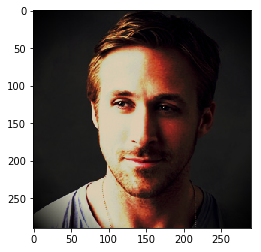

In [27]:
#LO-FI
adjusted_r = adjust_rgb(r, [0, 0.01, 0.10, 0.15, 0.4, 0.75, 0.8, 0.8, 0.9])
adjusted_g = adjust_rgb(g, [0, 0.01, 0.10, 0.15, 0.4, 0.75, 0.8, 0.8, 0.9])
adjusted_b = adjust_rgb(b, [0, 0.05, 0.10, 0.15, 0.4, 0.7, 0.7, 0.7, 0.7])
plt.imshow(adjusted_b)

lofi = rgb_merge(adjusted_r, adjusted_g, adjusted_b)

for i in range(ch):
    lofi[:,:,i] *= vignette  
plt.imshow(lofi)

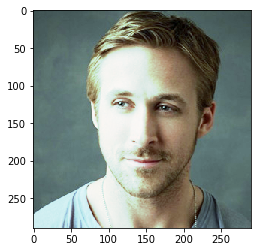

In [28]:
bluer_blacks = np.clip(b + 0.1, 0, 1.0)
greener_blacks = np.clip(g + 0.3, 0, 1.0)

#Nashville
adjusted_r = adjust_rgb(r, [0, 0.7, 1])
adjusted_g = adjust_rgb(g, [0, 0.9, 1])
adjusted_b = adjust_rgb(b, [0, 0.9, 1])
plt.imshow(adjusted_b)

nashville = rgb_merge(adjusted_r, adjusted_g, adjusted_b)
plt.imshow(nashville)

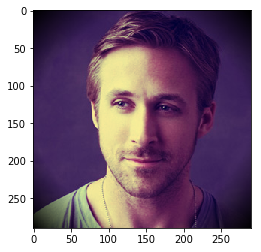

In [29]:
#X-Pro II 
#boost_lower midtones on g
#to-do: make a little warmer(red?), tone down highlights, too much contrast
#boost_midtones = [.1, .2, .4, .6, .6, .6, .7, .8, .9]
boost_lower = [0, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9, 0.95, 1.0] #midtone contrast boost
bluexpro = [.2, .37, .55, .6, .6]

xpro = rgb_merge(r, adjust_rgb(g, boost_lower), adjust_rgb(b, bluexpro))

for i in range(ch):
    xpro[:,:,i] *= vignette  
plt.imshow(xpro)

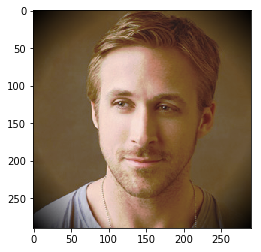

In [30]:
#Earlybird
#Less shadows
#Yellow tone (R + G)

bluer_blacks = np.clip(b + 0.3, 0, 1.0)

less_shadows = [0.8, 0.75, 0.7, 0.6, 0.5]

#boost_midtones = [0.25, 0.30, 0.35, 0.4, 0.4, 0.45, 0.5, 0.4, 0.35, 0.3]
boost_midtones = [.1, .2, .4, .6, .6, .6, .7, .8, .9]

edit_r = adjust_rgb(r, [0.15, 0.3, 0.4, 0.45, 0.5, 0.6, 0.75, 0.8, 0.9, 1.0])
edit_g = adjust_rgb(g, [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.75, 0.8, 0.9, 1.0])
edit_b = adjust_rgb(b, [.1, .15, .15, .35, .5, .6, .75, .8, .9, 1.0])

earlybird = rgb_merge(edit_r, edit_g, edit_b)

for i in range(ch):
    earlybird[:,:,i] *= vignette  

plt.imshow(earlybird)
